# Traffic Light Detection

## Imports

In [25]:
import numpy as np
import os
import sys
import tensorflow as tf
import time

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

In [26]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [27]:
sim_model_path = 'model_frozen_sim/frozen_inference_graph.pb'
real_model_path = 'model_frozen_real/frozen_inference_graph.pb'
labels_path = 'model/label_map.pbtxt'
image_size = (12, 8)

In [28]:
label_map = label_map_util.load_labelmap(labels)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=4, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Red'}, 2: {'id': 2, 'name': 'Yellow'}, 3: {'id': 3, 'name': 'Green'}, 4: {'id': 4, 'name': 'off'}}


In [29]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [30]:
from glob import glob

## Functions

In [39]:
def import_graph(model_path):
    detection_graph = tf.Graph()
    
    with detection_graph.as_default():
      od_graph_def = tf.GraphDef()
    
      with tf.gfile.GFile(model_path, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
    return detection_graph
        
    
def load_test_images(directory):
    print(os.path.join(directory, '*.jpg'))
    image_paths = glob(os.path.join(directory, '*.jpg'))
    print("Length of test images:", len(image_paths))
    return image_paths

In [40]:
def predict(detection_graph, image_paths):
    with detection_graph.as_default():
        with tf.Session(graph=detection_graph) as sess:
            # Definite input and output Tensors for detection_graph
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

            # Each box represents a part of the image where a particular object was detected.
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            for image_path in image_paths:
                image = Image.open(image_path)
                # the array based representation of the image will be used later in order to prepare the
                # result image with boxes and labels on it.
                image_np = load_image_into_numpy_array(image)
                # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
                image_np_expanded = np.expand_dims(image_np, axis=0)

                time0 = time.time()

                # Actual detection.
                (boxes, scores, classes, num) = sess.run(
                  [detection_boxes, detection_scores, detection_classes, num_detections],
                  feed_dict={image_tensor: image_np_expanded})

                time1 = time.time()

                boxes = np.squeeze(boxes)
                scores = np.squeeze(scores)
                classes = np.squeeze(classes).astype(np.int32)

                # Visualization of the results of a detection.
                vis_util.visualize_boxes_and_labels_on_image_array(
                    image_np, boxes, classes, scores,
                    category_index,
                    use_normalized_coordinates=True,
                    line_thickness=6)

                plt.figure(figsize=image_size)
                plt.imshow(image_np)
                plt.show()

                min_score_thresh = .50
                for i in range(boxes.shape[0]):
                    if scores is None or scores[i] > min_score_thresh:

                        class_name = category_index[classes[i]]['name']
                        print('{}'.format(class_name), scores[i])

                        fx =  0.97428
                        fy =  1.73205
                        perceived_width_x = (boxes[i][3] - boxes[i][1]) * 800
                        perceived_width_y = (boxes[i][2] - boxes[i][0]) * 600

                        # ymin, xmin, ymax, xmax = box
                        # depth_prime = (width_real * focal) / perceived_width
                        perceived_depth_x = ((.1 * fx) / perceived_width_x)
                        perceived_depth_y = ((.3 * fy) / perceived_width_y )

                        estimated_distance = round((perceived_depth_x + perceived_depth_y) / 2)
                        print("Distance (metres)", estimated_distance)
                        print("Time in milliseconds", (time1 - time0) * 1000, "\n")

## Detection: Simulator Test Pictures

test_images_sim/*.jpg
Length of test images: 12


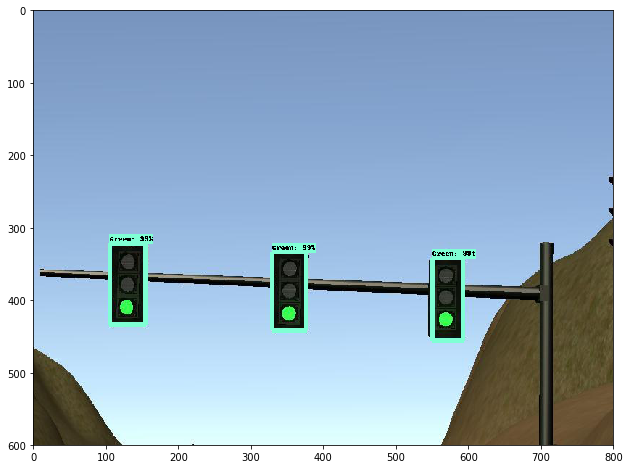

Green 0.999829
Distance (metres) 0.0
Time in milliseconds 364.04919624328613 

Green 0.999549
Distance (metres) 0.0
Time in milliseconds 364.04919624328613 

Green 0.998972
Distance (metres) 0.0
Time in milliseconds 364.04919624328613 



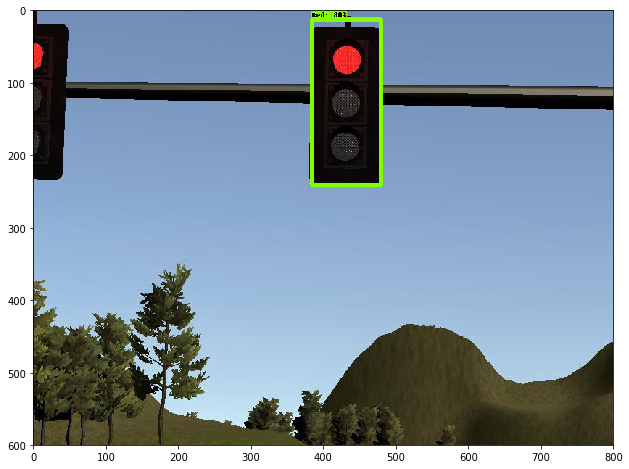

Red 0.801397
Distance (metres) 0.0
Time in milliseconds 21.94666862487793 



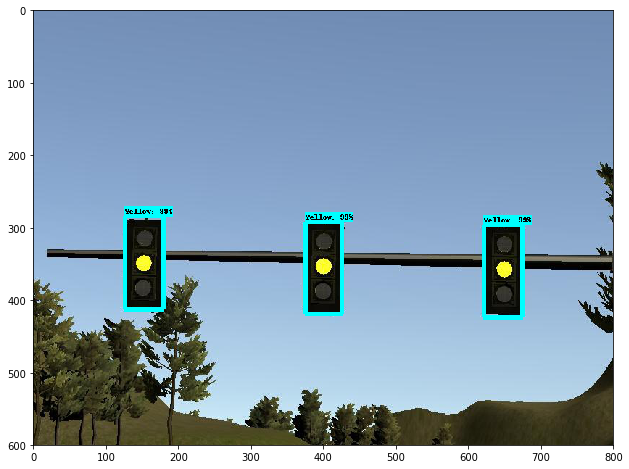

Yellow 0.999831
Distance (metres) 0.0
Time in milliseconds 22.06873893737793 

Yellow 0.999767
Distance (metres) 0.0
Time in milliseconds 22.06873893737793 

Yellow 0.998708
Distance (metres) 0.0
Time in milliseconds 22.06873893737793 



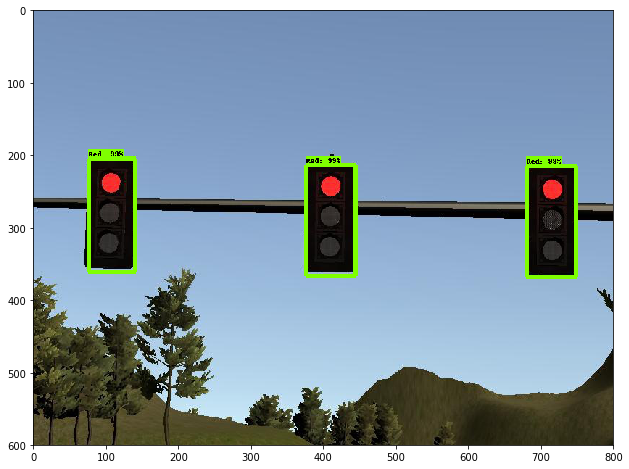

Red 0.998562
Distance (metres) 0.0
Time in milliseconds 22.11284637451172 

Red 0.996592
Distance (metres) 0.0
Time in milliseconds 22.11284637451172 

Red 0.993005
Distance (metres) 0.0
Time in milliseconds 22.11284637451172 



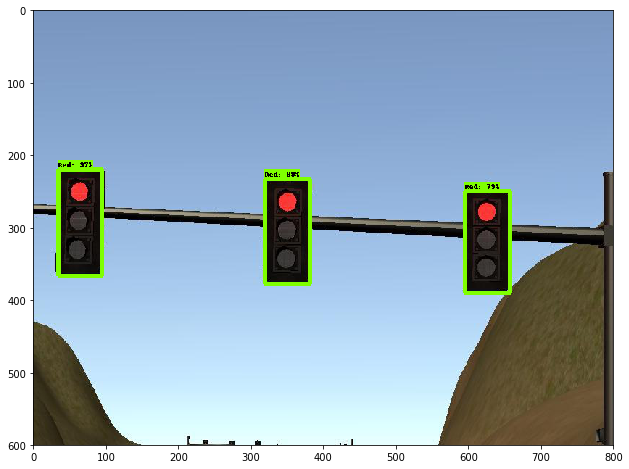

Red 0.995608
Distance (metres) 0.0
Time in milliseconds 23.56863021850586 

Red 0.971722
Distance (metres) 0.0
Time in milliseconds 23.56863021850586 

Red 0.790284
Distance (metres) 0.0
Time in milliseconds 23.56863021850586 



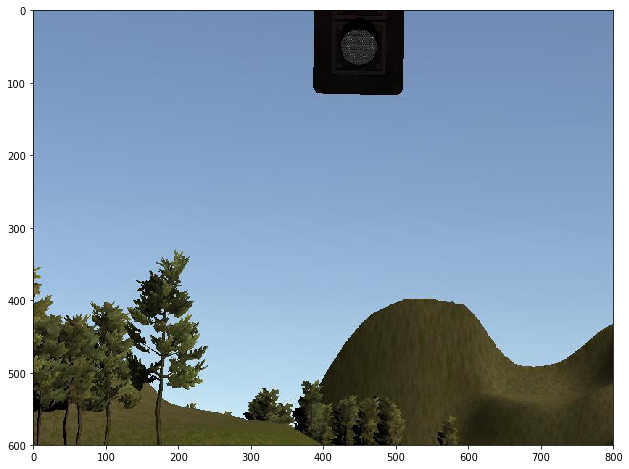

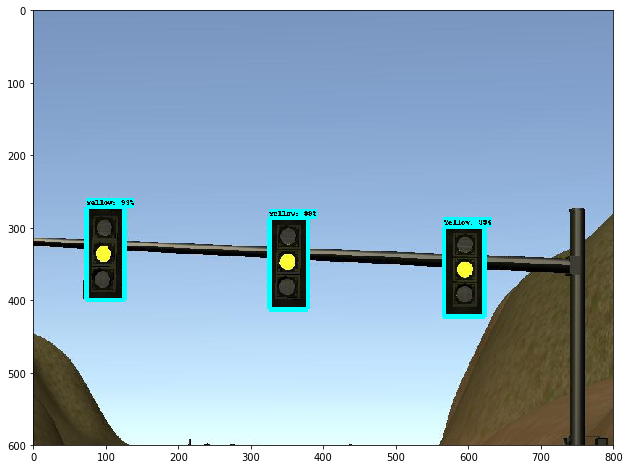

Yellow 0.999562
Distance (metres) 0.0
Time in milliseconds 22.13454246520996 

Yellow 0.997691
Distance (metres) 0.0
Time in milliseconds 22.13454246520996 

Yellow 0.995757
Distance (metres) 0.0
Time in milliseconds 22.13454246520996 



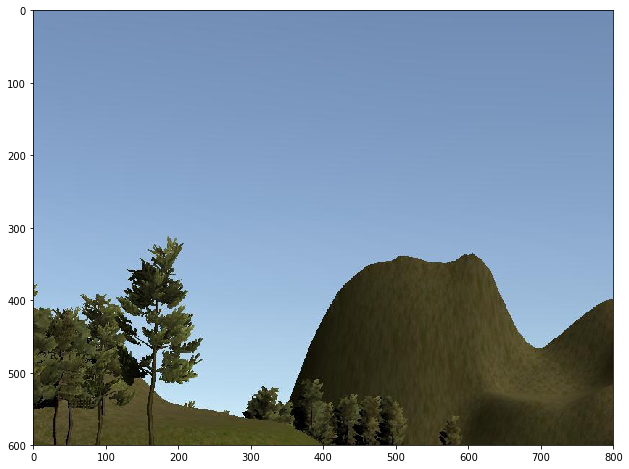

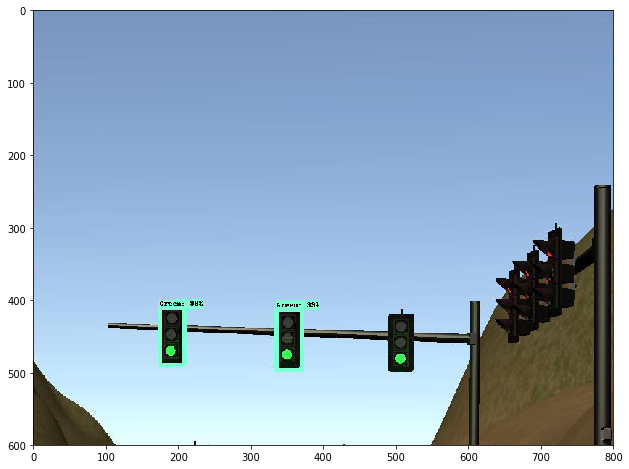

Green 0.999554
Distance (metres) 0.0
Time in milliseconds 22.099018096923828 

Green 0.996962
Distance (metres) 0.0
Time in milliseconds 22.099018096923828 



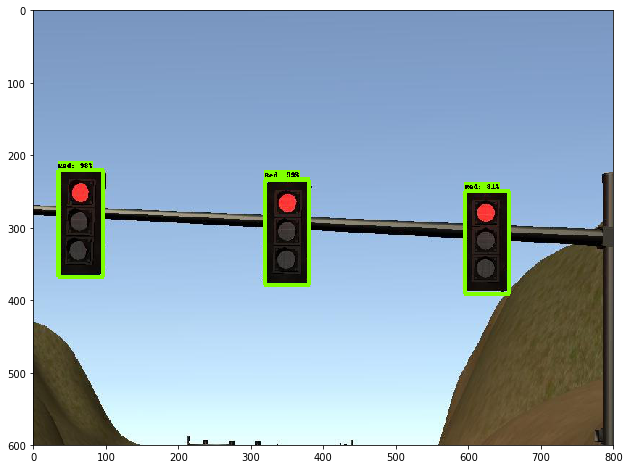

Red 0.997386
Distance (metres) 0.0
Time in milliseconds 23.523330688476562 

Red 0.987688
Distance (metres) 0.0
Time in milliseconds 23.523330688476562 

Red 0.818925
Distance (metres) 0.0
Time in milliseconds 23.523330688476562 



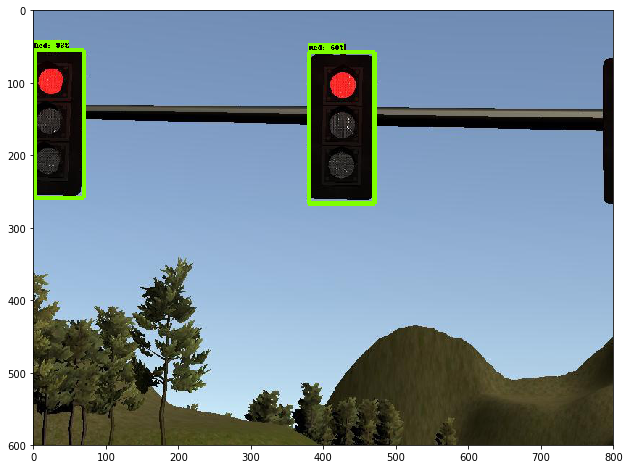

Red 0.930759
Distance (metres) 0.0
Time in milliseconds 22.13263511657715 

Red 0.600501
Distance (metres) 0.0
Time in milliseconds 22.13263511657715 



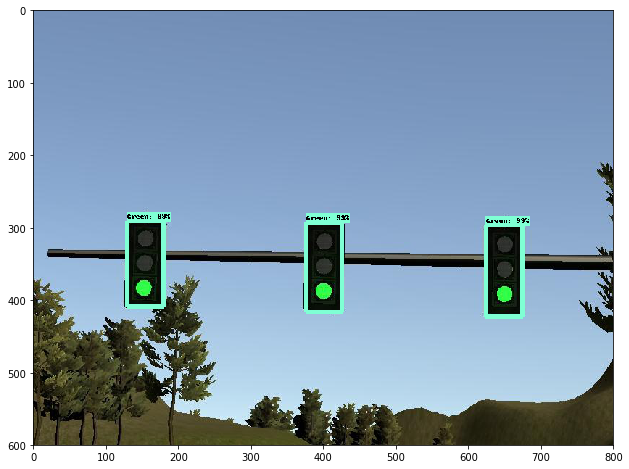

Green 0.999779
Distance (metres) 0.0
Time in milliseconds 23.41771125793457 

Green 0.999734
Distance (metres) 0.0
Time in milliseconds 23.41771125793457 

Green 0.999231
Distance (metres) 0.0
Time in milliseconds 23.41771125793457 



In [41]:
detection_graph = import_graph(sim_model_path)
image_paths = load_test_images("test_images_sim")
predict(detection_graph, image_paths)

## Detection: Real Test Pictures

In [45]:
detection_graph = import_graph(sim_model_path)
image_paths = load_test_images("test_images_real")
predict(detection_graph, image_paths)

test_images_real/*.jpg
Length of test images: 0
